In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
world=pd.read_csv(r"C:\Users\Amrita\Downloads\hospital_beds_global_regional_v1.csv")

In [3]:
world.head()

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url
0,AD,NaN,NaN,42.50,1.5,ICU,1000HAB,0.071,83747,2011,icm-journal,https://link.springer.com/article/10.1007/s001...
1,AD,NaN,NaN,42.50,1.5,TOTAL,1000HAB,2.500,84463,2009,wdi,https://data.worldbank.org/indicator/SH.MED.BE...
2,AE,NaN,NaN,24.00,54.0,TOTAL,1000HAB,1.200,9197910,2013,wdi,https://data.worldbank.org/indicator/SH.MED.BE...
3,AF,NaN,NaN,33.00,65.0,TOTAL,1000HAB,0.500,34413603,2015,wdi,https://data.worldbank.org/indicator/SH.MED.BE...
4,AG,NaN,NaN,17.05,-61.8,TOTAL,1000HAB,3.800,92562,2014,wdi,https://data.worldbank.org/indicator/SH.MED.BE...


In [4]:
world.describe()

,lat,lng,beds,population,year
count,6241.000000,6241.000000,6241.000000,6.241000e+03,6241.000000
mean,37.447922,-82.066750,1.816929,3.082538e+06,2017.988463
std,9.047209,37.433191,12.657171,4.125641e+07,1.940260
min,-41.000000,-175.000000,0.000000,7.400000e+01,1970.000000
25%,32.354668,-98.484246,0.144119,1.862000e+04,2018.000000
50%,37.964253,-86.902298,0.633957,4.950000e+04,2018.000000
75%,41.878003,-80.454903,2.283743,2.002940e+05,2019.000000
max,72.000000,178.000000,971.725071,1.386000e+09,2020.000000


In [5]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 12 columns):
country       6241 non-null object
state         5905 non-null object
county        5750 non-null object
lat           6241 non-null float64
lng           6241 non-null float64
type          6241 non-null object
measure       6241 non-null object
beds          6241 non-null float64
population    6241 non-null int64
year          6241 non-null int64
source        6241 non-null object
source_url    6241 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 585.2+ KB


In [6]:
world.drop(world.columns[world.isnull().all()],inplace=True, axis=1)

In [7]:
print(world.type.unique())
print(world.measure.unique())
print(world.year.unique())

['ICU' 'TOTAL' 'ACUTE' 'PSYCHIATRIC' 'OTHER']
['1000HAB']
[2011 2009 2013 2015 2014 2005 2017 2016 2018 2010 1996 2012 2006 1970
 1985 2020 1990 2004 2007 2019 2008 2001]


In [8]:
world.isnull().sum()

country         0
state         336
county        491
lat             0
lng             0
type            0
measure         0
beds            0
population      0
year            0
source          0
source_url      0
dtype: int64

# Removing null columns cuz they are useless

In [10]:
world=world.drop(['state','county'],axis=1)

In [11]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 10 columns):
country       6241 non-null object
lat           6241 non-null float64
lng           6241 non-null float64
type          6241 non-null object
measure       6241 non-null object
beds          6241 non-null float64
population    6241 non-null int64
year          6241 non-null int64
source        6241 non-null object
source_url    6241 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 487.7+ KB


In [13]:
##As mentioned in the dataset that the beds value is per 1000 then from that we can calculate total beds

#Total beds= (population/1000)*beds

In [14]:
world["Total_beds"]=(world["population"]/1000)*world["beds"]

In [15]:
world["beds_percent"]=(world.Total_beds/world.population)*100 #Calculating bed's Percentage

In [16]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 12 columns):
country         6241 non-null object
lat             6241 non-null float64
lng             6241 non-null float64
type            6241 non-null object
measure         6241 non-null object
beds            6241 non-null float64
population      6241 non-null int64
year            6241 non-null int64
source          6241 non-null object
source_url      6241 non-null object
Total_beds      6241 non-null float64
beds_percent    6241 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 585.2+ KB


Text(0.5, 0, 'Year')

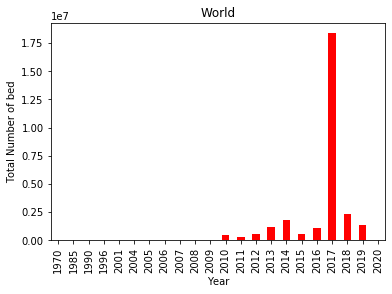

In [17]:
#Plotting the year and total number of beds in World
world[["Total_beds","year"]].groupby('year').sum().Total_beds.plot(kind="bar",color="red")
plt.title("World")
plt.ylabel("Total Number of bed")
plt.xlabel("Year")

([<matplotlib.axis.XTick at 0x1c5f9a689e8>,
 <a list of 20 Text xticklabel objects>)

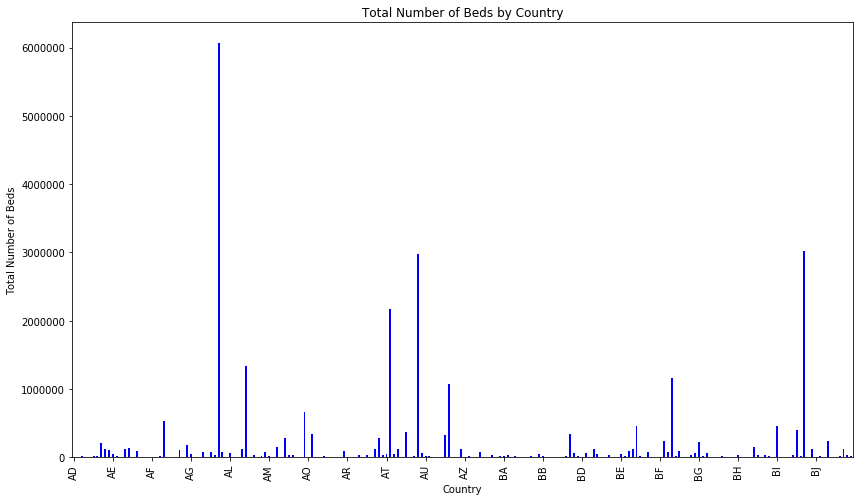

In [25]:
grouped_data = world[["country", "Total_beds"]].groupby('country').sum()
plt.figure(figsize=(14, 8))
grouped_data['Total_beds'].plot(kind="bar", color="blue")
plt.ylabel("Total Number of Beds")
plt.xlabel("Country")
plt.title("Total Number of Beds by Country")
plt.xticks(ticks=range(0, len(grouped_data.index), len(grouped_data.index)//20))

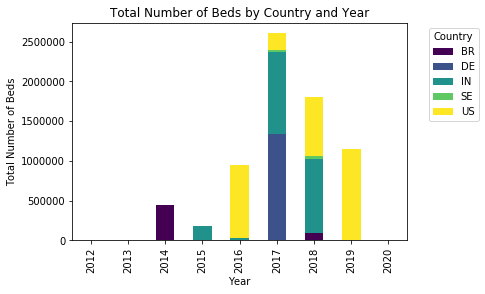

In [60]:
#Total no of beds in US,INDIA,DENMARK,BRAZIL AND SWEDEN
temp = sum(world.Total_beds)
filtered_world = world[(world['year'] >= 2010) & (world['year'] <= 2020)]
selected_countries = ["US", "IN", "DE","BR","SE"]

# Filter the DataFrame to include only the selected countries
filtered_world = world[world['country'].isin(selected_countries)]

# Group, pivot, and plot as before
filtered_world[["Total_beds", "country", "year"]].groupby(['year', 'country']).sum().reset_index().pivot(index='year', columns='country', values='Total_beds').plot(kind="bar", stacked=True, colormap="viridis")

plt.ylabel("Total Number of Beds")
plt.xlabel("Year")
plt.title("Total Number of Beds by Country and Year")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

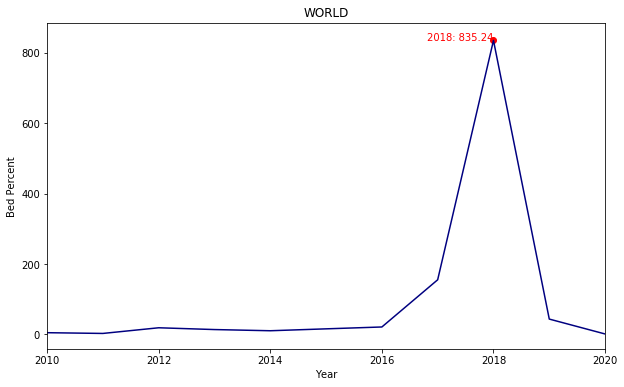

In [37]:
temp = sum(world.Total_beds)

# Filter data for the years 2010 to 2020
filtered_data = world[(world['year'] >= 2010) & (world['year'] <= 2020)]
grouped_data = filtered_data[["beds_percent", "year"]].groupby('year').sum()
max_value = grouped_data['beds_percent'].max()
max_year = grouped_data['beds_percent'].idxmax()

# Plotting
plt.figure(figsize=(10, 6))
grouped_data['beds_percent'].plot(kind="line", color="navy")
plt.ylabel("Bed Percent")
plt.xlabel("Year")
plt.title("WORLD")

# Highlight the max value on the plot
plt.scatter(max_year, max_value, color='red')
plt.text(max_year, max_value, f'{max_year}: {max_value:.2f}', horizontalalignment='right', color='red')

plt.show()

In [29]:
#From above graph we can conclude that 2018 has overall highest bed percentage with respect to population in world

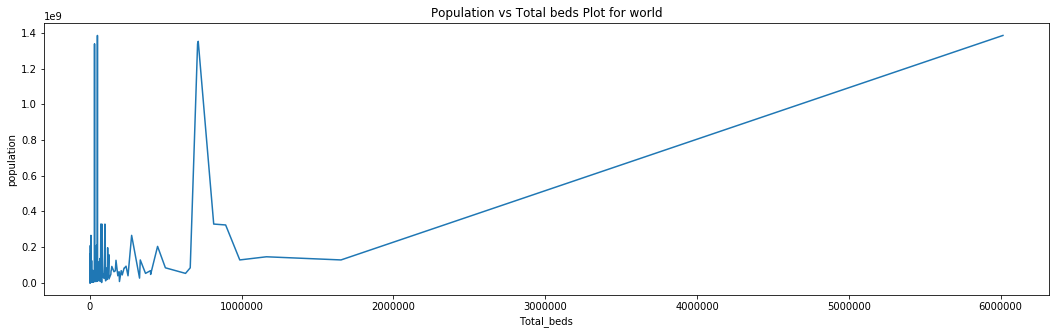

In [31]:
f, axes = plt.subplots(1,1,figsize=(18,5))
sns.lineplot(y="population", x= 'Total_beds', data=world )
plt.title('Population vs Total beds Plot for world')
plt.show()

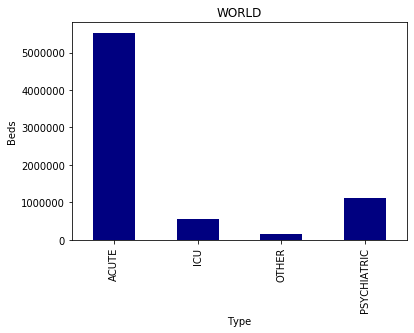

In [50]:
#Type vs Total beds
filtered_world = world[world['type'] != 'TOTAL']

# Group by type and sum the total beds
total_beds_by_type = filtered_world.groupby('type')['Total_beds'].sum()

# Create the bar plot
total_beds_by_type.plot(kind="bar", color="navy")
plt.title("WORLD")
plt.xlabel("Type")
plt.ylabel("Beds")

# Display the plot
plt.show()

In [33]:
#From Above graph we can say world has most number of beds as Acute type

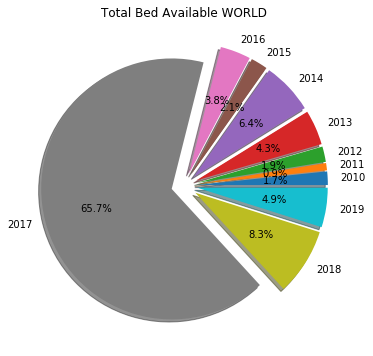

In [40]:
#Pie char for total beds available in world
temp = sum(world.Total_beds)

filtered_data = world[(world['year'] >= 2010) & (world['year'] <= 2019)]
# Grouping the data by year and summing the total beds
grouped_data = filtered_data[["Total_beds", "year"]].groupby('year').sum()
# Determine the number of unique years
num_years = len(grouped_data)

# Set the explode list to match the number of years
explode = [0.1] * num_years  # Exploding all slices slightly

# Plotting the pie chart
plt.figure(figsize=(10, 6))
grouped_data['Total_beds'].plot(
    kind="pie",
    shadow=True,
    autopct='%1.1f%%',
    radius=1,
    explode=explode
)
plt.title("Total Bed Available WORLD", loc="center")
plt.ylabel("")  # Hides the y-label for the pie chart

plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

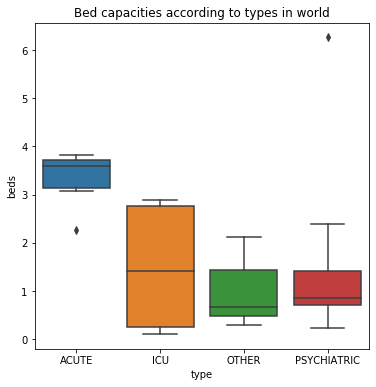

In [42]:
#Box plot for type and year
filtered_world = world[world['type'] != 'TOTAL']

# Group by type and year, then calculate the mean of beds
Value = filtered_world.groupby(['type', 'year'])['beds'].mean()
output=Value.reset_index()
plt.figure(figsize = (6, 6))
ax = sns.boxplot(x='type', y='beds', data=output)
ax.set_title('Bed capacities according to types in world')
plt.xticks()

In [51]:
India = world[world['country'] == 'IN']

In [52]:
USA = world[world['country'] == 'US']

In [54]:
India.head()

,country,lat,lng,type,measure,beds,population,year,source,source_url,Total_beds,beds_percent
236,IN,11.7401,92.6586,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,1074.999822,0.282508
237,IN,15.9129,79.7400,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,23137.980320,0.043607
238,IN,28.2180,94.7278,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,2404.000655,0.142789
239,IN,26.2006,92.9376,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,17141.994115,0.049775
240,IN,25.0961,85.3131,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,11664.001477,0.009484


In [55]:
USA.head()

,country,lat,lng,type,measure,beds,population,year,source,source_url,Total_beds,beds_percent
511,US,63.588753,-154.493062,ICU,1000HAB,0.000000,3338,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...,0.000000,0.000000
512,US,63.588753,-154.493062,ICU,1000HAB,0.000000,5784,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...,0.000000,0.000000
513,US,63.588753,-154.493062,ACUTE,1000HAB,2.182916,298225,2018,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...,651.000124,0.218292
514,US,63.588753,-154.493062,ICU,1000HAB,0.244782,298225,2019,khn,https://khn.org/news/as-coronavirus-spreads-wi...,73.000112,0.024478
515,US,63.588753,-154.493062,OTHER,1000HAB,0.191131,298225,2019,arcgis,https://services1.arcgis.com/Hp6G80Pky0om7QvQ/...,57.000042,0.019113


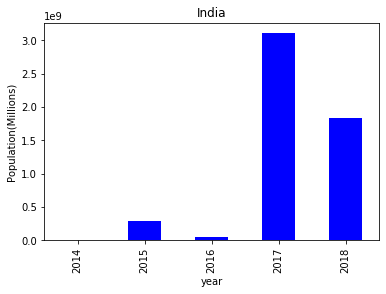

In [56]:
#Displaying India's population
plt.title("India")
plt.xlabel("Year")
plt.ylabel("Population(Millions)")
India[["population","year"]].groupby('year').sum().population.plot(kind="bar",color="blue")

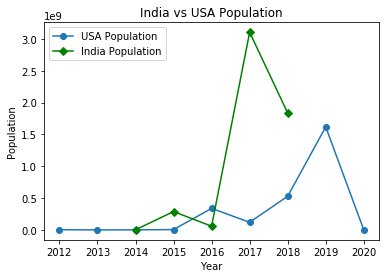

In [57]:
#India vs USA Population
plt.plot(sorted(USA.year.unique()),USA[["year","population"]].groupby('year').sum().population,'-o',label="USA Population")
plt.plot(sorted(India.year.unique()),India[["year","population"]].groupby('year').sum().population,'g-D',label="India Population")
plt.ylabel("Population")
plt.xlabel("Year")
plt.title("India vs USA Population")
plt.legend()

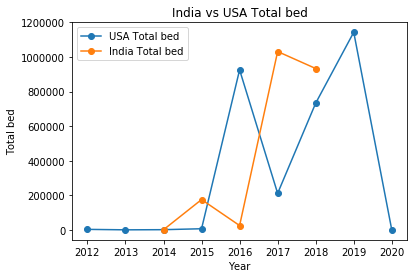

In [58]:
#India vs USA TOTAL BEDS
plt.plot(sorted(USA.year.unique()),USA[["year","Total_beds"]].groupby('year').sum().Total_beds,'-o',label="USA Total bed")
plt.plot(sorted(India.year.unique()),India[["year","Total_beds"]].groupby('year').sum().Total_beds,'-o',label="India Total bed")
plt.ylabel("Total bed")
plt.xlabel("Year")
plt.title("India vs USA Total bed")
plt.legend()

# At the end we successfully process the world data and plot various graphs  then we compare the India and USA data with respect to total bed and year and population also